# Loan approval prediction

### Access data [here](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data)

## The goal of this project is to build a machine learning model to predict whethere one's loan application will be rejected or approved based on features like loan amount, credit score, income and ....

In [3]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Data
df = pd.read_csv('./loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data cleaning and preprocessing

In [7]:
# Check data properties
print("Lenght of data: ", len(df))
print('-----------------')
print('df info', df.info())

Lenght of data:  4269
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)

In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
# Check for null values
print('Null values in data:\n' , df.isnull().sum())

Null values in data:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [10]:
# Adding new features

df[' debt_to_income_ratio'] = df[' loan_amount'] / df[' income_annum']
df[' total_assets_value'] = (df[' residential_assets_value'] + df[' commercial_assets_value'] +
                            df[' luxury_assets_value'] + df[' bank_asset_value'])
df[' loan_to_asset_ratio'] = df[' loan_amount'] / df[' total_assets_value']

# If you want polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[[' income_annum', ' loan_amount', ' cibil_score']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out([' income_annum', ' loan_amount', ' cibil_score']))

# Concatenate polynomial features to the original dataframe, dropping original columns
df = pd.concat([df.drop([' income_annum', ' loan_amount', ' cibil_score'], axis=1), poly_features_df], axis=1)
df


,loan_id,no_of_dependents,education,self_employed,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,...,loan_to_asset_ratio,income_annum,loan_amount,cibil_score,income_annum^2,income_annum loan_amount,income_annum cibil_score,loan_amount^2,loan_amount cibil_score,cibil_score^2
0,1,2,Graduate,No,12,2400000,17600000,22700000,8000000,Approved,...,0.589744,9600000.0,29900000.0,778.0,9.216000e+13,2.870400e+14,7.468800e+09,8.940100e+14,2.326220e+10,605284.0
1,2,0,Not Graduate,Yes,8,2700000,2200000,8800000,3300000,Rejected,...,0.717647,4100000.0,12200000.0,417.0,1.681000e+13,5.002000e+13,1.709700e+09,1.488400e+14,5.087400e+09,173889.0
2,3,3,Graduate,No,20,7100000,4500000,33300000,12800000,Rejected,...,0.514731,9100000.0,29700000.0,506.0,8.281000e+13,2.702700e+14,4.604600e+09,8.820900e+14,1.502820e+10,256036.0
3,4,3,Graduate,No,8,18200000,3300000,23300000,7900000,Rejected,...,0.582543,8200000.0,30700000.0,467.0,6.724000e+13,2.517400e+14,3.829400e+09,9.424900e+14,1.433690e+10,218089.0
4,5,5,Not Graduate,Yes,20,12400000,8200000,29400000,5000000,Rejected,...,0.440000,9800000.0,24200000.0,382.0,9.604000e+13,2.371600e+14,3.743600e+09,5.856400e+14,9.244400e+09,145924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,12,2800000,500000,3300000,800000,Rejected,...,0.310811,1000000.0,2300000.0,317.0,1.000000e+12,2.300000e+12,3.170000e+08,5.290000e+12,7.291000e+08,100489.0
4265,4266,0,Not Graduate,Yes,20,4200000,2900000,11000000,1900000,Approved,...,0.565000,3300000.0,11300000.0,559.0,1.089000e+13,3.729000e+13,1.844700e+09,1.276900e+14,6.316700e+09,312481.0
4266,4267,2,Not Graduate,No,18,1200000,12400000,18100000,7300000,Rejected,...,0.612821,6500000.0,23900000.0,457.0,4.225000e+13,1.553500e+14,2.970500e+09,5.712100e+14,1.092230e+10,208849.0
4267,4268,1,Not Graduate,No,8,8200000,700000,14100000,5800000,Approved,...,0.444444,4100000.0,12800000.0,780.0,1.681000e+13,5.248000e+13,3.198000e+09,1.638400e+14,9.984000e+09,608400.0


In [11]:
# Drop loan_id (useless column)
df = df.drop(['loan_id'], axis=1)

# Separate categorical and numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

print("Numerical columns: ", numerical_cols)
print("Categorical columns: ", categorical_cols)

Numerical columns:  [' no_of_dependents', ' loan_term', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' debt_to_income_ratio', ' total_assets_value', ' loan_to_asset_ratio', ' income_annum', ' loan_amount', ' cibil_score', ' income_annum^2', ' income_annum  loan_amount', ' income_annum  cibil_score', ' loan_amount^2', ' loan_amount  cibil_score', ' cibil_score^2']
Categorical columns:  [' education', ' self_employed', ' loan_status']


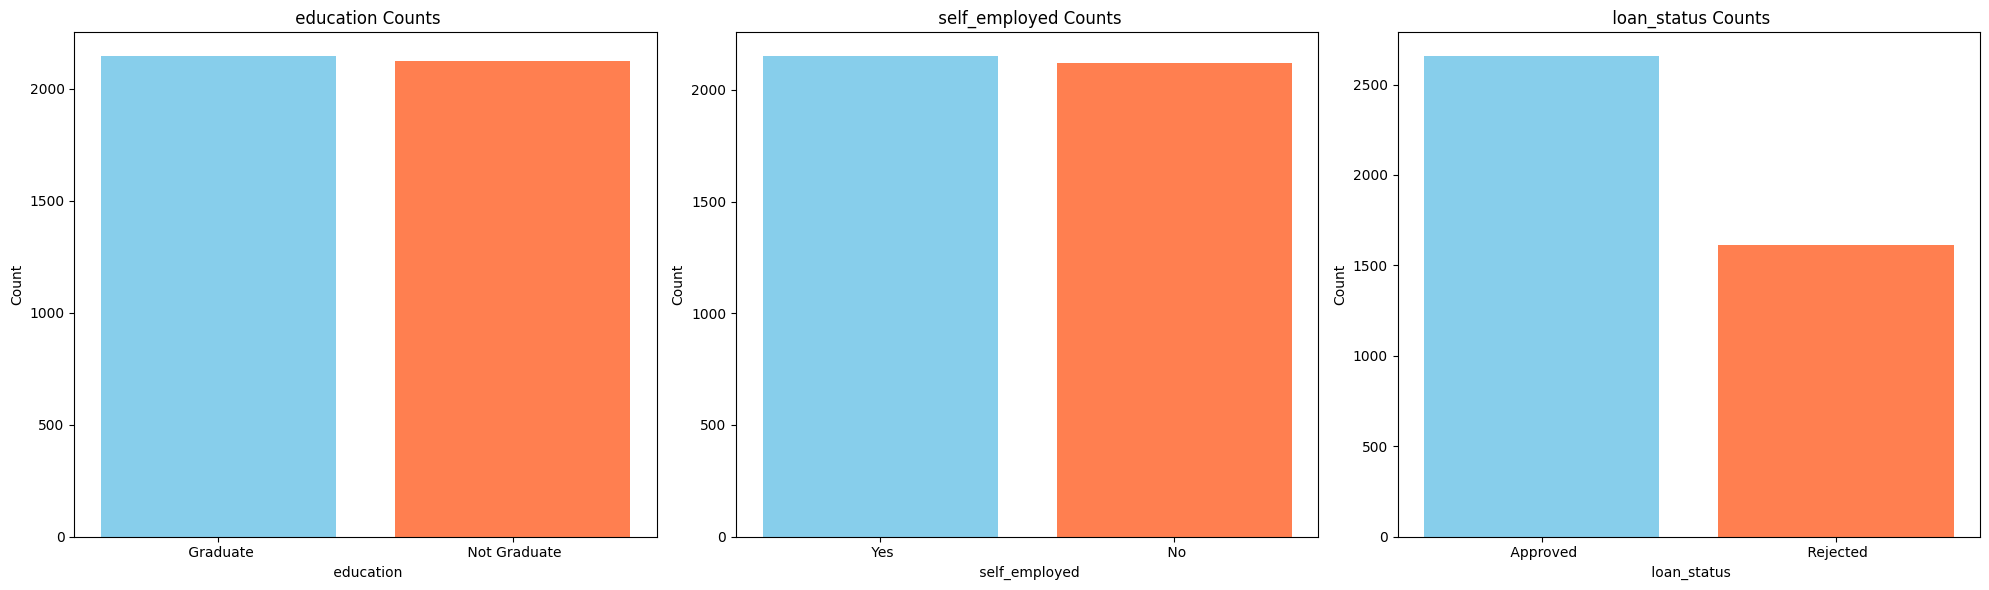

In [12]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

colors = ['skyblue','coral']

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color=colors)
    axes[i].set_title(f'{col} Counts')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

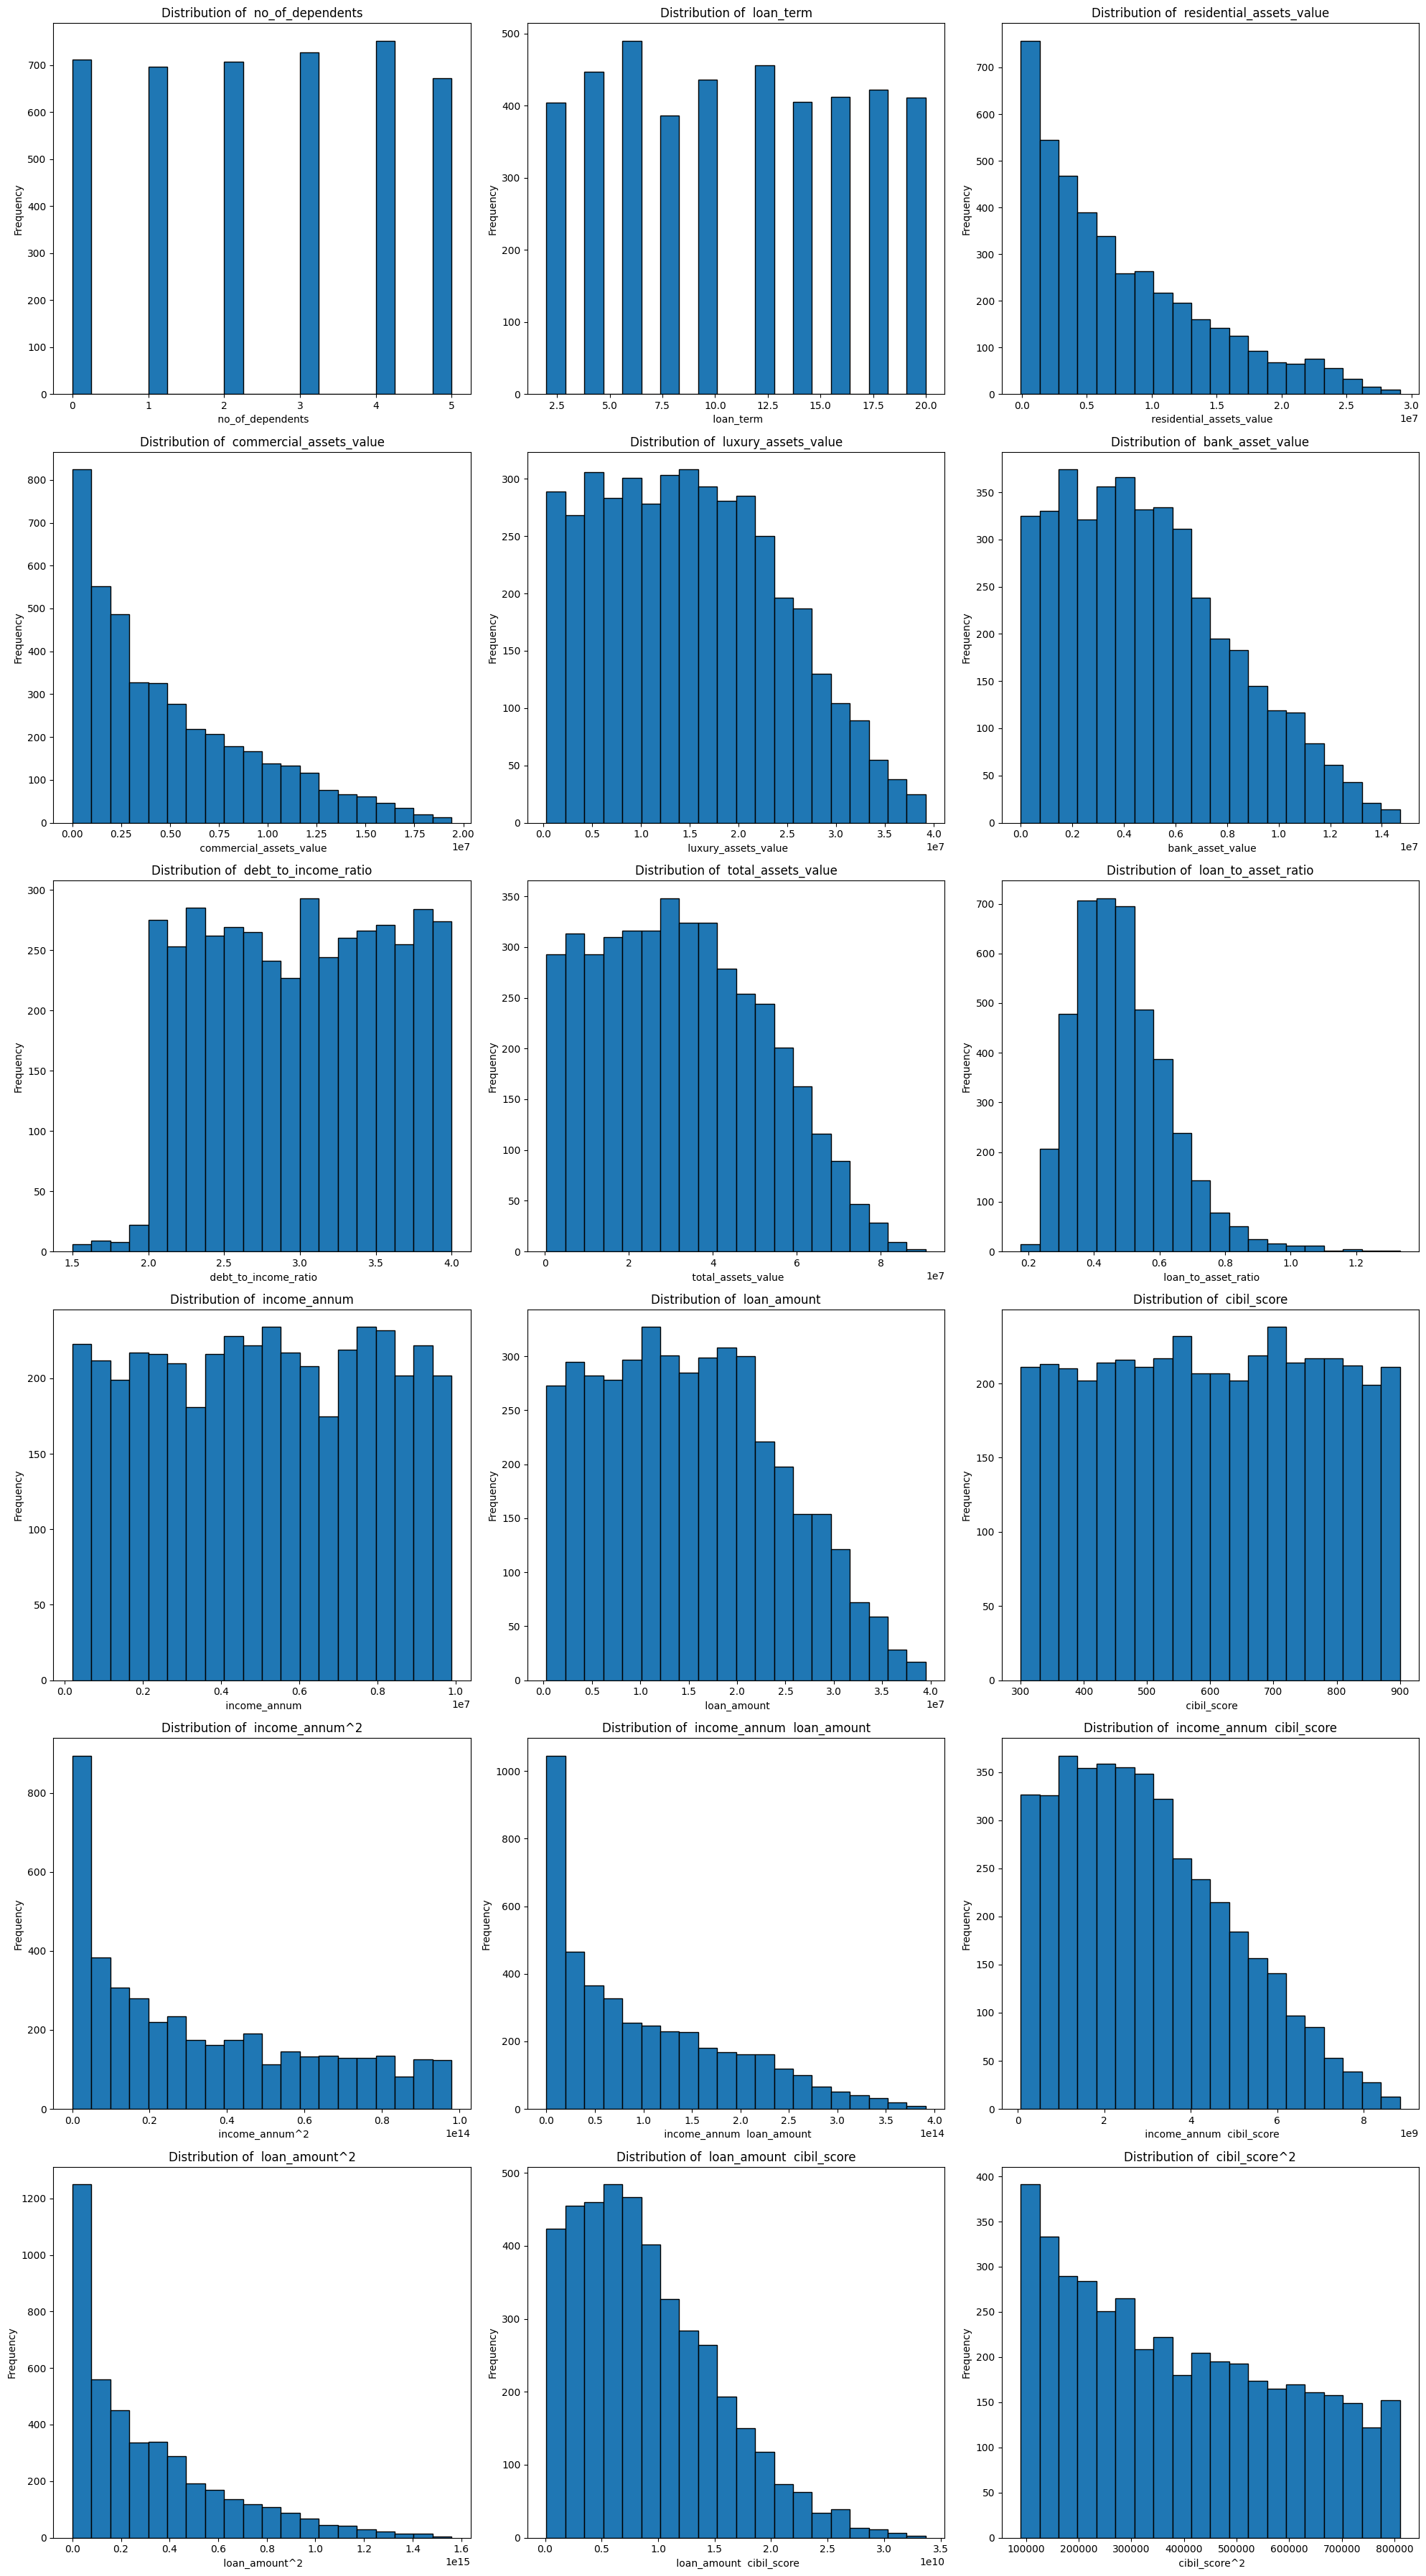

In [13]:
# Plot histograms for numerical vars

# Create a figure with subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


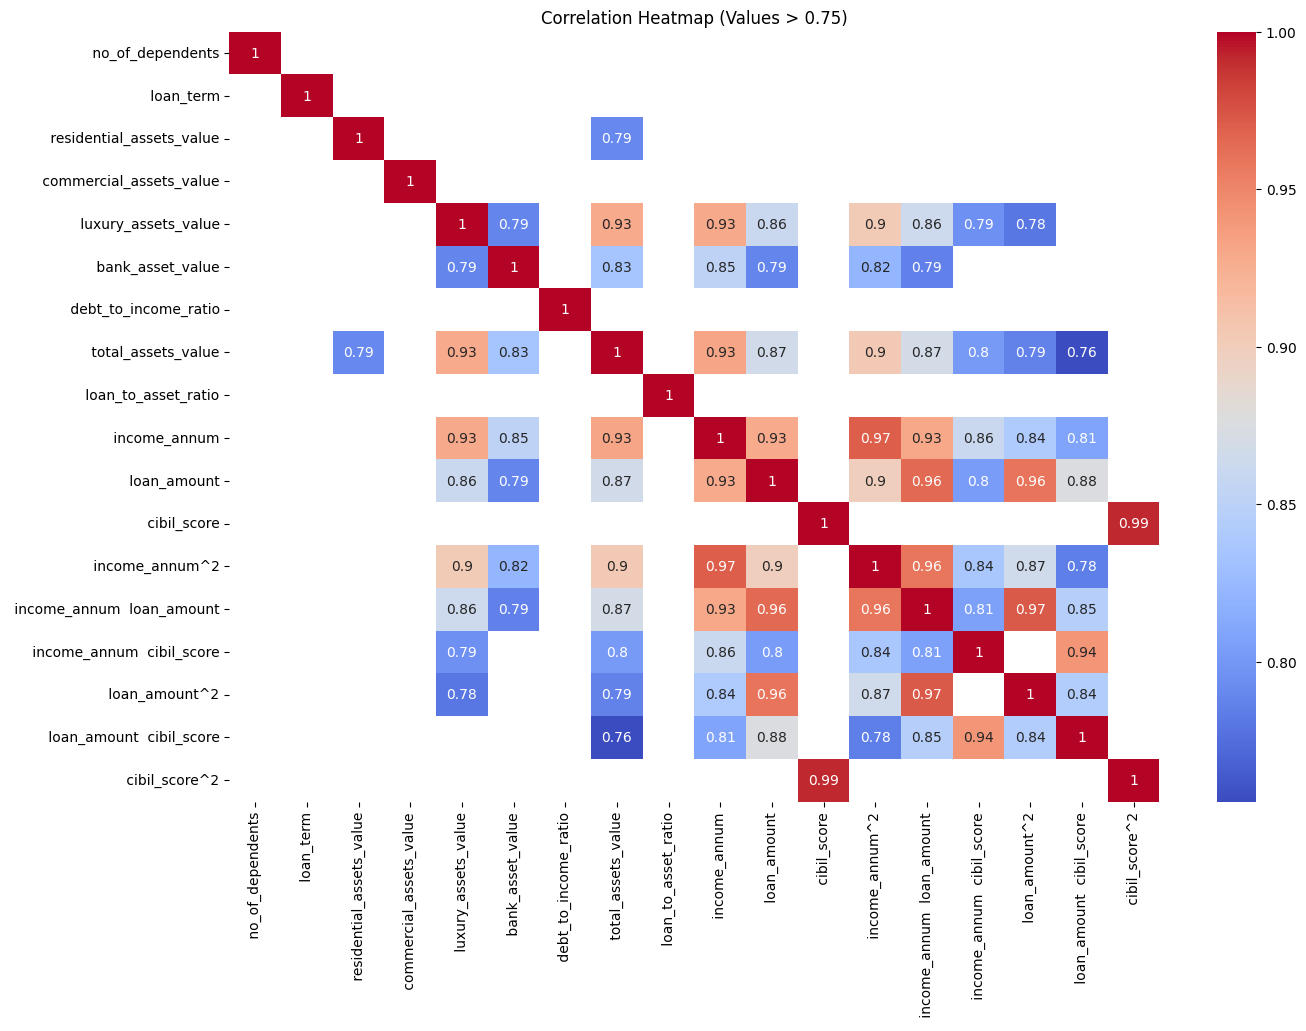

In [14]:
# Plot correlation heatmap only show values more than 0.75

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a mask for values below 0.75
mask = np.abs(corr_matrix) < 0.75

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

# Set the title
plt.title('Correlation Heatmap (Values > 0.75)')

# Display the plot
plt.show()


In [15]:
# Label encode categorical cols
from sklearn.preprocessing import LabelEncoder


def label_encode(df, cols):

    le = LabelEncoder()
    for col in cols:
      df[col] = le.fit_transform(df[col])

    return df

# Remove taget column
categorical_cols.remove(' loan_status')

df = label_encode(df, categorical_cols)

# Manually encode target classes to make sure they are being labeled correctly
df[' loan_status'].replace({' Approved': 1, ' Rejected': 0}, inplace=True)

In [16]:
# Scale numerical cols
from sklearn.preprocessing import StandardScaler

def standard_scale(df, cols):
    scaler = StandardScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

df = standard_scale(df, numerical_cols)

In [17]:
from sklearn.decomposition import PCA # Optional

# feature and target vars
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

# Apply PCA
# pca = PCA(n_components=0.95)  # Keep 95% of the variance
# X_pca = pca.fit_transform(X)

# Split into train, test and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Pass X_pca if needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3415, 20)
X_test shape: (854, 20)


Deep Neural Network

In [24]:
# Model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2

model = Sequential()
# Input layer
model.add(Dense(256, kernel_initializer='he_normal', input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Hidden layers
model.add(Dense(128, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(16, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='sigmoid')) # Binary classification

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,137 (199.75 KB)

 Trainable params: 50,145 (195.88 KB)

 Non-trainable params: 992 (3.88 KB)

In [25]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Optimizer
sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
call_backs = [reduce_lr, early_stopping]

# Compile model
model.compile(optimizer= sgd , loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=call_backs)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8399 - loss: 3.2352 - val_accuracy: 0.7951 - val_loss: 0.6143 - learning_rate: 0.1000
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8924 - loss: 0.4479 - val_accuracy: 0.9251 - val_loss: 0.3622 - learning_rate: 0.1000
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9068 - loss: 0.3915 - val_accuracy: 0.9145 - val_loss: 0.3967 - learning_rate: 0.1000
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8946 - loss: 0.4081 - val_accuracy: 0.9087 - val_loss: 0.3524 - learning_rate: 0.1000
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8995 - loss: 0.3891 - val_accuracy: 0.9415 - val_loss: 0.3410 - learning_rate: 0.1000
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9050 - loss: 0.3590 - val_accuracy: 0.9356 - val_loss: 0.3175 - learning_rate: 0.1000
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9089 - loss: 0.

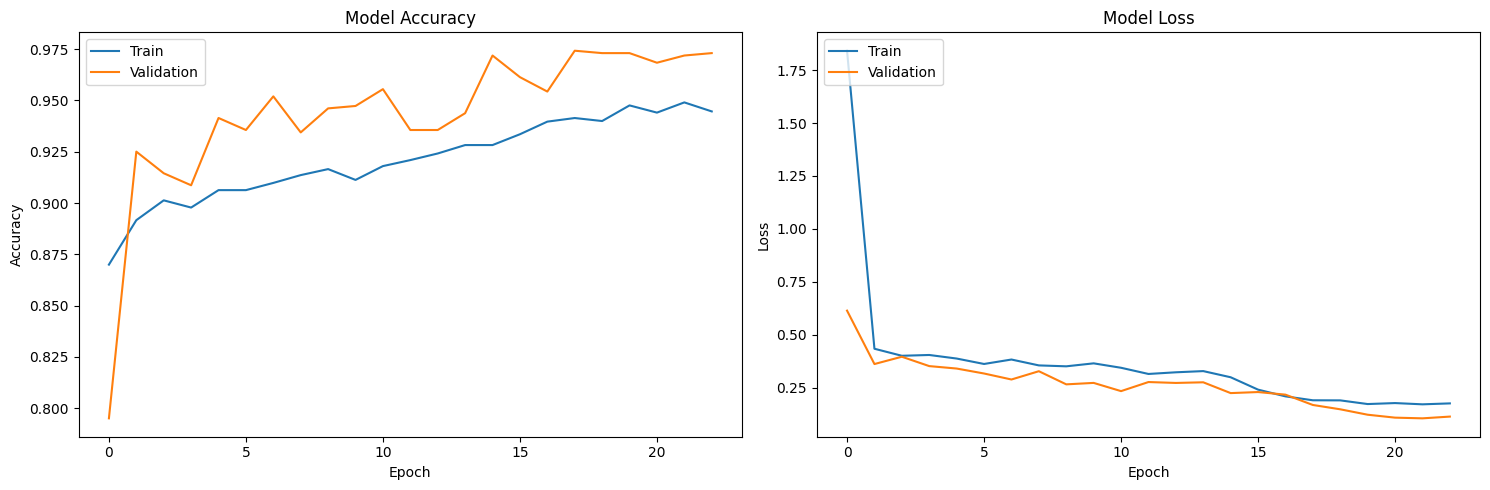

In [26]:
# Define a function to plot metrics throughout training

import matplotlib.pyplot as plt
def plot_metrics(history):
  # Create a figure with two subplots
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  # Plot training & validation accuracy values
  axes[0].plot(history.history['accuracy'])
  axes[0].plot(history.history['val_accuracy'])
  axes[0].set_title('Model Accuracy')
  axes[0].set_ylabel('Accuracy')
  axes[0].set_xlabel('Epoch')
  axes[0].legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  axes[1].plot(history.history['loss'])
  axes[1].plot(history.history['val_loss'])
  axes[1].set_title('Model Loss')
  axes[1].set_ylabel('Loss')
  axes[1].set_xlabel('Epoch')
  axes[1].legend(['Train', 'Validation'], loc='upper left')

  plt.tight_layout()
  plt.show()

plot_metrics(history)


In [27]:
# Save the model into google drive (Optional, if you are on colab)
# model.save('/content/drive/My Drive/loan_approval_prediction.h5')


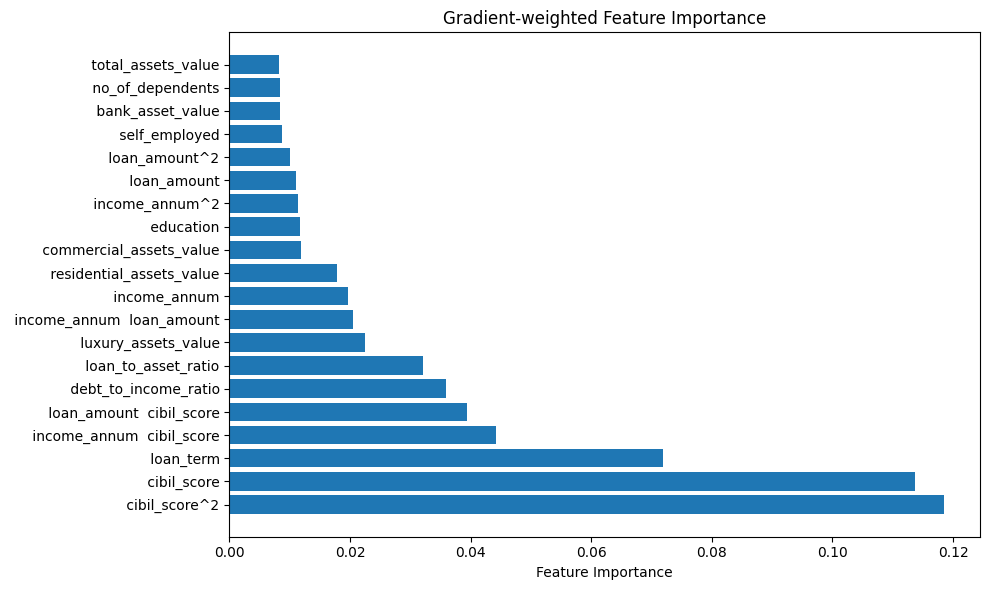

In [28]:
import tensorflow as tf

# Calculate gradients of output with respect to input features
def compute_gradients(model, inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs)
    grads = tape.gradient(predictions, inputs)
    return grads

# Function to compute feature importance
def feature_importance(model, X):
    grads = compute_gradients(model, X)
    feature_importance_scores = np.mean(np.abs(grads), axis=0)
    return feature_importance_scores

# Get feature importance scores
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
importance_scores = feature_importance(model, X_train_tensor)

# Plot feature importance
def plot_feature_importance(feature_names, scores):
    sorted_indices = np.argsort(scores)[::-1]
    sorted_scores = scores[sorted_indices]
    sorted_features = feature_names[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_scores)), sorted_scores, align='center')
    plt.yticks(range(len(sorted_scores)), sorted_features)
    plt.xlabel('Feature Importance')
    plt.title('Gradient-weighted Feature Importance')
    plt.tight_layout()
    plt.show()

# Assuming X_train.columns contains the feature names
plot_feature_importance(X_train.columns, importance_scores)


Traditional classifiers

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
!pip install catboost --quiet
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define models with their respective parameter grids for GridSearchCV
model_dict = {
    "LogisticRegression": (LogisticRegression(), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__solver': ['liblinear', 'lbfgs']}),
    "SVC": (SVC(), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf'], 'classifier__gamma': ['scale', 'auto']}),
    "RandomForestClassifier": (RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}),
    "XGBClassifier": (XGBClassifier(), {'classifier__learning_rate': [0.1, 0.01], 'classifier__max_depth': [3, 5, 7]}),
    "KNeighborsClassifier": (KNeighborsClassifier(), {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}),
    "GaussianNB": (GaussianNB(), {}),
    "AdaBoostClassifier": (AdaBoostClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "GradientBoostingClassifier": (GradientBoostingClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0], 'classifier__max_depth': [3, 5]}),
    "CatBoostClassifier": (CatBoostClassifier(verbose=0, allow_writing_files=False), {'classifier__iterations': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "LGBMClassifier": (LGBMClassifier(verbose=-1), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "HistGradientBoostingClassifier": (HistGradientBoostingClassifier(verbose=0), {'classifier__max_iter': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]})
}

# Perform GridSearchCV for each model with PCA
for model_name, (model, param_grid) in model_dict.items():
    print(f"Running GridSearchCV for {model_name} ...")

    # Create a pipeline 
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

    # Evaluate on validation set with best model
    best_model = grid_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification report\n", classification_report(y_test, y_pred))
    print("---------------------------")


Running GridSearchCV for LogisticRegression ...
Best parameters for LogisticRegression: {'classifier__C': 10.0, 'classifier__solver': 'lbfgs'}
Best cross-validation accuracy for LogisticRegression: 0.92
LogisticRegression Accuracy: 0.9309133489461359
LogisticRegression Classification report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       323
           1       0.95      0.94      0.94       531

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

---------------------------
Running GridSearchCV for SVC ...
Best parameters for SVC: {'classifier__C': 10.0, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.96
SVC Accuracy: 0.9660421545667447
SVC Classification report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       3

## Conclusion

### We reached up to 97% accuracy with a deep neural network and ovr 99% using traditional machine learning classifiers.

In [31]:
# # How to use the model for predictions 

# from tensorflow.keras.models import load_model
# from sklearn.pipeline import Pipeline

# # Load the model
# model = load_model('path_to_model.h5')

# # Create a pipeline (no preprocessing steps needed since the model expects preprocessed data)
# pipeline = Pipeline([
#     ('model', model)
# ])

# # The pipeline is now ready to use for predictions
# # Example usage:
# # predictions = pipeline.predict(preprocessed_data) 